## Limpeza de dados

In [2]:
import pandas as pd

df = pd.read_csv('../../sources/covid_ml.csv', sep=';', header=0)

df

,id,sexo,data_entrada,pneumonia,gravidez,diabetes,asma,imunodeficiencia,hipertensão,outra doença,cardiovascular,obesidade,renal_crônico,tabaco,contate outro covid,UTI
0,16169f,2,04/05/2020,2,3,2,2,2,2,2,2,2,2,2,2,3
1,1009bf,2,19/03/2020,2,3,2,2,2,2,2,2,2,2,2,3,3
2,167386,1,06/04/2020,2,2,2,2,2,2,2,2,1,2,2,3,2
3,0b5948,2,17/04/2020,1,3,2,2,2,2,2,2,2,2,2,3,2
4,0d01b5,1,13/04/2020,2,2,1,2,2,1,2,1,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,13/05/2020,2,3,1,2,2,2,2,2,2,2,2,2,3
566598,047cd1,1,07/04/2020,2,2,2,2,2,2,2,2,2,2,2,2,3
566599,1beb81,1,14/05/2020,1,2,2,2,2,2,2,2,1,2,2,3,2
566600,16fb02,1,31/05/2020,1,2,2,2,2,2,2,2,2,2,2,2,3


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = df.iloc[:,1:14]
# print(data)

le = LabelEncoder()
data['data_entrada'] = le.fit_transform(data['data_entrada'])

target = df.iloc[:,-1]
# 1 é internado na UTI
# 2 é covid sem estar internado
# 3 sem covid sem internar
# print(target)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.95, random_state=4)

print(x_train.shape) # linhas e colunas do dataset
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(28330, 13)
(538272, 13)
(28330,)
(538272,)


## Treinando o modelo

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(2,4)
scores_train, scores_test = {}, {}
conf_matrix_train, conf_matrix_test = {}, {}
scores_train_list, scores_test_list = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    scores_train[k] = metrics.accuracy_score(y_train, y_pred_train)
    conf_matrix_train[k] = metrics.confusion_matrix(y_train, y_pred_train)
    scores_train_list.append(scores_train[k])

    y_pred_test = knn.predict(x_test)
    scores_test[k] = metrics.accuracy_score(y_test, y_pred_test)
    conf_matrix_test[k] = metrics.confusion_matrix(y_test, y_pred_test)
    scores_test_list.append(scores_test[k])

## Testando o modelo

### Gráfico de acurácia na base de teste por K 

Text(0.5, 1.0, 'Acurácia vs valor de K')

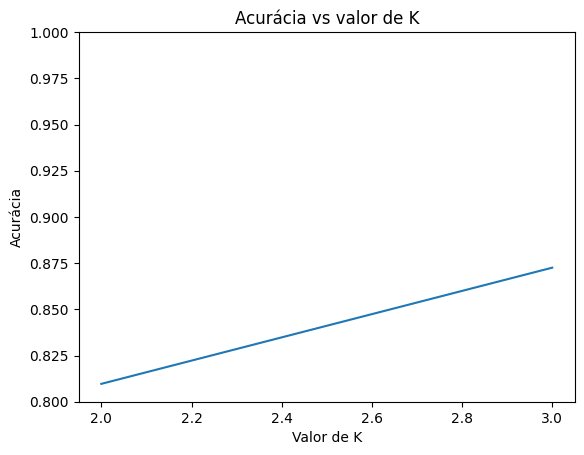

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_train_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.title('Acurácia vs valor de K')

### Matrizes de confusão por K

In [6]:

for k in conf_matrix_train:
    print(k)
    print(conf_matrix_train[k])

2
[[  345   111    44]
 [  407  4019  1130]
 [  151  3549 18574]]
3
[[  192   206   102]
 [  226  3098  2232]
 [  100   745 21429]]


### Gráfico de acurácia na base de treino por K 

Text(0.5, 1.0, 'Acurácia vs valor de K')

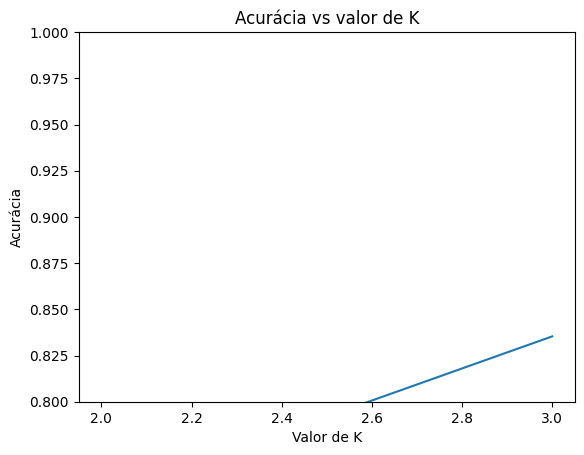

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_test_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.title('Acurácia vs valor de K')

### Matrizes de confusão por K

In [8]:
for k in conf_matrix_test:
    print(k)
    print(conf_matrix_test[k])

2
[[  1416   6494   1702]
 [ 10810  59476  35834]
 [  3540  76963 342037]]
3
[[   896   5767   2949]
 [  6517  47866  51737]
 [  1632  20017 400891]]
